In [1]:
# Change here using YOUR own first and last names
fn1 = "Leying"
ln1 = "ZHANG"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

print(filename)

sd-tsia204_lab2_zhang_leying.ipynb


In [2]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier
from sklearn import linear_model
import scipy
import matplotlib.pyplot as plt
import os
import pandas as pd
import urllib
import zipfile
import sys
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import sklearn
from sklearn import datasets


We are given a dataset; we are trying to predict the value of variable Y with some covariates X (as
columns) for which there are n i.i.d. measurements (as the rows of the data provided) over p covariates.
However, it is not clear whether all the covariates are relevant for the prediction of Y . In this TP, we are
going to consider several variants of the OLS to make a regressor under this setting and identify relevant
variables.

### 1
Preprocess the data:
    Set the random seed to 0.
    Load the data. Print the mean, and standard deviation of every covariate. Is the data centered?
    Normalized? Standardized?
    Separate the data frame in two matrices, X and Y , containing the input and output data respectively.
    Separate the covariate data in train and test sets. Save one fourth of the data as testing.
    Center and standardize the train and test data and plot its mean and variance again. Use the functions fit_transform and transform.
    Create two empty dataFrames of names df_test and df_coef.

In [3]:
np.random.seed(0)
df=pd.read_csv('data_dm3.csv',header=None)
print(df.info())

row = df.shape[0]
column = df.shape[1]

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Columns: 211 entries, 0 to 210
dtypes: float64(211)
memory usage: 728.7 KB
None


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


From my point of view, the data is centered means the average is 0, the data is normalized means the standard veviation is 1, the data is standarized means the standard veviation is 1 and the average is 0.

In [4]:
print("mean of each covariate \n",df.mean(),'\n')
print("variance of each covariate \n",df.var(),'\n')
print("standard deviation of each covariate \n", np.sqrt(df.var()))

eta = 1e-10
print("Under the threshold = {}".format(eta))
flag_centered = np.ones(column-1)
for i in range(column-1):
    if df.mean()[i]>eta or df.mean()[i] < -eta:
        print("The {}th covariate is not centered, with mean = {}".format(i,df.mean()[i]))
        flag_centered[i] = 0
    else:
        print("The {}th covariate is centered, with mean = {}".format(i,df.mean()[i]))

print("Under the threshold = {}".format(eta))
flag_normalized = np.ones(column-1)
for i in range(column-1):
    if np.sqrt(df.var())[i]>1+eta or np.sqrt(df.var())[i] < 1-eta:
        print("The {}th covariate is not normalized, with standard deviation = {}".format(i,np.sqrt(df.var())[i]))
        flag_normalized[i]=0
    else:
        print("The {}th covariate is normalized, with standard deviation = {}".format(i,np.sqrt(df.var())[i]))

print("Under the threshold = {}".format(eta))
flag_normalized = np.ones(column-1)
for i in range(column-1):
    if np.sqrt(df.var())[i]>1+eta or np.sqrt(df.var())[i] < 1-eta:
        print("The {}th covariate is not normalized, with standard deviation = {}".format(i,np.sqrt(df.var())[i]))
        flag_normalized[i]=0
    else:
        print("The {}th covariate is normalized, with standard deviation = {}".format(i,np.sqrt(df.var())[i]))

    
for i in range(column-1):
    if flag_centered[i] == 1 and flag_normalized[i] == 1:
        print("The {}th covariate is standarized".format(i))
    else:
        print("The {}th covariate is not standarized".format(i))
        
        
print("\nThe mean, variance and standard deviation of Y is {},{},{}".format(df.mean()[column-1],df.var()[column-1],np.sqrt(df.var())[column-1]))
if df.mean()[column-1]>eta or df.mean()[column-1] < -eta:
    print("Y is not centered, with mean = {}".format(df.mean()[column-1]))
    flag1 = 1
if np.sqrt(df.var())[column-1]>1+eta or np.sqrt(df.var())[column-1] < 1-eta:
    print("Y is not normalized, with standard deviation = {}".format(np.sqrt(df.var())[column-1]))
    flag2 = 1
if flag1 == 1 and flag2 == 1:
    print("Y is not standarized")

mean of each covariate 
 0      7.535450e-19
1     -1.507090e-17
2      5.494599e-20
3     -7.284269e-18
4      8.288995e-18
           ...     
206    3.265362e-17
207    1.507090e-17
208   -4.034606e-18
209    1.205672e-17
210    1.521335e+02
Length: 211, dtype: float64 

variance of each covariate 
 0         1.002268
1         1.002268
2         1.002268
3         1.002268
4         1.002268
          ...     
206       1.002268
207       1.002268
208       1.002268
209       1.002268
210    5943.331348
Length: 211, dtype: float64 

standard deviation of each covariate 
 0       1.001133
1       1.001133
2       1.001133
3       1.001133
4       1.001133
         ...    
206     1.001133
207     1.001133
208     1.001133
209     1.001133
210    77.093005
Length: 211, dtype: float64
Under the threshold = 1e-10
The 0th covariate is centered, with mean = 7.535450393383416e-19
The 1th covariate is centered, with mean = -1.507090078676683e-17
The 2th covariate is centered, with mean = 5

The 137th covariate is centered, with mean = 3.0895346612872004e-17
The 138th covariate is centered, with mean = -5.7771786349272854e-18
The 139th covariate is centered, with mean = -2.9639438213974767e-17
The 140th covariate is centered, with mean = 3.083255119292714e-17
The 141th covariate is centered, with mean = 1.3312629028310701e-17
The 142th covariate is centered, with mean = 3.0141801573533662e-18
The 143th covariate is centered, with mean = -5.5259969551478376e-18
The 144th covariate is centered, with mean = -8.03781375294231e-18
The 145th covariate is centered, with mean = -2.059689774191467e-17
The 146th covariate is centered, with mean = -2.2480760340260523e-17
The 147th covariate is centered, with mean = 5.2748152753683906e-18
The 148th covariate is centered, with mean = -1.607562750588462e-17
The 149th covariate is centered, with mean = 2.5118167977944717e-18
The 150th covariate is centered, with mean = 1.607562750588462e-17
The 151th covariate is centered, with mean = 3.

The 81th covariate is not normalized, with standard deviation = 1.0011331448394594
The 82th covariate is not normalized, with standard deviation = 1.0011331448394587
The 83th covariate is not normalized, with standard deviation = 1.0011331448394585
The 84th covariate is not normalized, with standard deviation = 1.001133144839459
The 85th covariate is not normalized, with standard deviation = 1.0011331448394587
The 86th covariate is not normalized, with standard deviation = 1.0011331448394591
The 87th covariate is not normalized, with standard deviation = 1.0011331448394591
The 88th covariate is not normalized, with standard deviation = 1.0011331448394587
The 89th covariate is not normalized, with standard deviation = 1.001133144839459
The 90th covariate is not normalized, with standard deviation = 1.0011331448394591
The 91th covariate is not normalized, with standard deviation = 1.0011331448394591
The 92th covariate is not normalized, with standard deviation = 1.0011331448394594
The 93

The 195th covariate is not normalized, with standard deviation = 1.001133144839459
The 196th covariate is not normalized, with standard deviation = 1.0011331448394587
The 197th covariate is not normalized, with standard deviation = 1.0011331448394591
The 198th covariate is not normalized, with standard deviation = 1.0011331448394591
The 199th covariate is not normalized, with standard deviation = 1.0011331448394591
The 200th covariate is not normalized, with standard deviation = 1.0011331448394587
The 201th covariate is not normalized, with standard deviation = 1.0011331448394591
The 202th covariate is not normalized, with standard deviation = 1.0011331448394587
The 203th covariate is not normalized, with standard deviation = 1.0011331448394587
The 204th covariate is not normalized, with standard deviation = 1.001133144839459
The 205th covariate is not normalized, with standard deviation = 1.0011331448394594
The 206th covariate is not normalized, with standard deviation = 1.00113314483

The 90th covariate is not normalized, with standard deviation = 1.0011331448394591
The 91th covariate is not normalized, with standard deviation = 1.0011331448394591
The 92th covariate is not normalized, with standard deviation = 1.0011331448394594
The 93th covariate is not normalized, with standard deviation = 1.0011331448394587
The 94th covariate is not normalized, with standard deviation = 1.001133144839459
The 95th covariate is not normalized, with standard deviation = 1.0011331448394598
The 96th covariate is not normalized, with standard deviation = 1.0011331448394587
The 97th covariate is not normalized, with standard deviation = 1.001133144839459
The 98th covariate is not normalized, with standard deviation = 1.001133144839459
The 99th covariate is not normalized, with standard deviation = 1.0011331448394598
The 100th covariate is not normalized, with standard deviation = 1.0011331448394587
The 101th covariate is not normalized, with standard deviation = 1.001133144839459
The 10

The 205th covariate is not normalized, with standard deviation = 1.0011331448394594
The 206th covariate is not normalized, with standard deviation = 1.0011331448394591
The 207th covariate is not normalized, with standard deviation = 1.0011331448394594
The 208th covariate is not normalized, with standard deviation = 1.001133144839459
The 209th covariate is not normalized, with standard deviation = 1.0011331448394591
The 0th covariate is not standarized
The 1th covariate is not standarized
The 2th covariate is not standarized
The 3th covariate is not standarized
The 4th covariate is not standarized
The 5th covariate is not standarized
The 6th covariate is not standarized
The 7th covariate is not standarized
The 8th covariate is not standarized
The 9th covariate is not standarized
The 10th covariate is not standarized
The 11th covariate is not standarized
The 12th covariate is not standarized
The 13th covariate is not standarized
The 14th covariate is not standarized
The 15th covariate is

To summary, all the columns of X are centered but not normalized under the threshold of 1e-10. Y is not centered and normalized, it is also not standalized

In [5]:
#Separate the dataframe
def train_test_split(data, target_col, percent_split=0.85, random=False, frac=1):
    if random:
        data = data.sample(frac=frac)
    X_train, y_train, X_test, y_test = ([], [], [], [])
    int_treshold = int(len(data) * percent_split)

    X = data.drop(target_col, axis=1, inplace=False)
    Y = data[target_col]

    X_test = X[int_treshold:]
    Y_test = Y[int_treshold:]

    X_train = X[:int_treshold]
    Y_train = Y[:int_treshold]

    return X.to_numpy(), Y.to_numpy(), X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy()

X, Y, X_train, Y_train, X_test, Y_test = train_test_split(df,column-1, percent_split=0.75,random=False, frac=1)

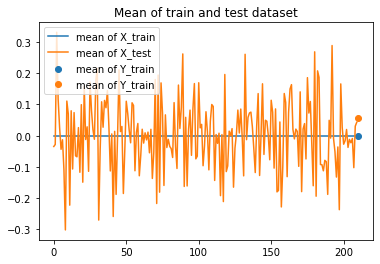

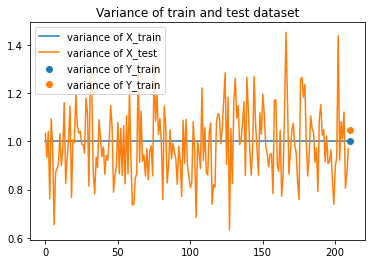

In [6]:
from sklearn.preprocessing import StandardScaler
#Standarize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Y_train_std = sc.fit_transform( np.reshape(Y_train,(len(Y_train),1)) )
Y_test_std = sc.transform( np.reshape(Y_test,(len(Y_test),1))  )

#plot mean
x = range(column-1)
y = np.mean(X_train_std,axis = 0)
plt.plot(x,y,label='mean of X_train')

x = range(column-1)
y = np.mean(X_test_std,axis = 0)
plt.plot(x,y,label='mean of X_test')

x = [column-1]
y = np.mean(Y_train_std,axis = 0)
plt.scatter(x,y,label='mean of Y_train')

x = [column-1]
y = np.mean(Y_test_std,axis = 0)
plt.scatter(x,y,label='mean of Y_train')
plt.legend()
plt.title("Mean of train and test dataset")
plt.show()

#plot variance
x = range(column-1)
y = np.var(X_train_std,axis = 0)
plt.plot(x,y,label='variance of X_train')

x = range(column-1)
y = np.var(X_test_std,axis = 0)
plt.plot(x,y,label='variance of X_test')

x = [column-1]
y = np.var(Y_train_std,axis = 0)
plt.scatter(x,y,label='variance of Y_train')

x = [column-1]
y = np.var(Y_test_std,axis = 0)
plt.scatter(x,y,label='variance of Y_train')
plt.title("Variance of train and test dataset")
plt.legend()
plt.show()

We use fit_transform for the training set and transform for the test set. training data uses its own features when doing normalization, so the normalize effect is good. However, since the test set is small, the mean and variance used in the transform are based on the training set, and this difference between data sets causes fluctuations in the mean and variance of the new data set after its normalization.

In [7]:
#Create empty dataframe
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

### 2
Write a function to compute the determination coefficient and another to compute the mean squared
error.

In [8]:

#calculate determination_coefficient
def  determination_coefficient(Y_test,Y_pred):
    Y_test = Y_test.ravel()
    Y_pred = Y_pred.ravel()
    Y_mean = np.mean(Y_test)
    r2 = 1 - np.sum((Y_pred - Y_test)**2)/np.sum((Y_test - Y_mean)**2)
    return r2

#calculate mean squared error
def mean_square_error(Y_test,Y_pred):
    mse = np.mean((Y_test-Y_pred)**2)
    return mse

### 3
Using sklearn utilities, fit a linear regression model on the train set that we will use as baseline.

• apply the linear regression of the sklearn library to the train data,

• print the determination coefficient and the MSE of the test data,

• add a column named OLS to the df_test dataframe that contains the predicted values for the
sample and

• add a column named OLS to the df_coef dataframe that contains the estimated coefficients.

In [9]:
linear_reg =linear_model.LinearRegression().fit(X_train_std, Y_train_std)
Y_pred_std = linear_reg.predict(X_test_std)

print("determination coefficient of sklearn library", linear_reg.score(X_test_std,Y_test_std))

print("Determination coefficient: ",determination_coefficient(Y_test_std,Y_pred_std))
print("MSE :",mean_square_error(Y_test_std,Y_pred_std))


df_test['OLS']=Y_pred_std.reshape(-1)
df_coef['OLS']=linear_reg.coef_.reshape(-1)

print(df_coef.head(5))

determination coefficient of sklearn library 0.14108847238464617
Determination coefficient:  0.14108847238464617
MSE : 0.9002201449238063
            OLS
0  7.396077e+13
1  1.946277e+13
2 -4.474714e+13
3 -2.270448e+13
4 -5.934315e+12


### 4
Plot a heatmap of the covariance matrix. Compute the singular value decomposition of the covariance matrix. For consistency in the notation use U, s, V=SVD(XtX)

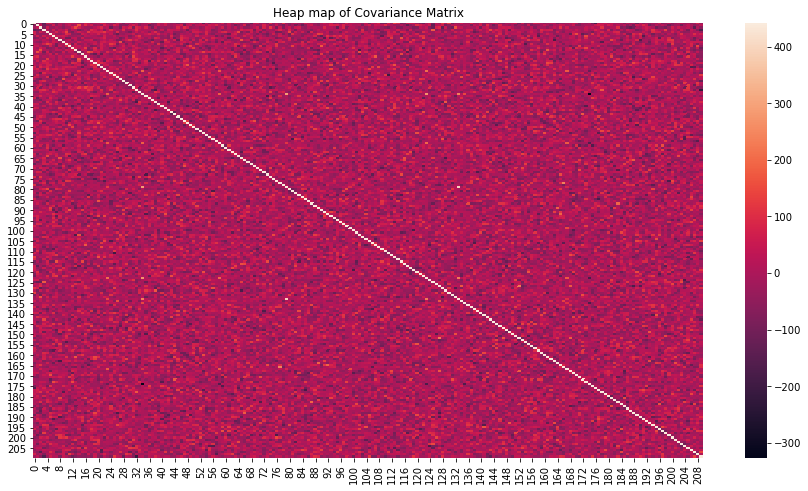

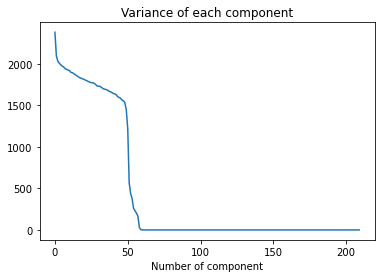

In [10]:
#According to the exercice, we define here cov = X.T@X
#In order to do the PCA, we need to make our X centered and standardized

sc_PCA = StandardScaler()
X_std = sc_PCA.fit_transform(X)

cov = X_std.T@X_std

plt.figure(figsize=(15, 8))
sns.heatmap(cov).set_title('Heap map of Covariance Matrix')
plt.show()

u,s,vh = np.linalg.svd(cov)

plt.plot(range(len(s)),s)
plt.title("Variance of each component")
plt.xlabel("Number of component")
plt.show()

### 5



We can do the SVD for any matrix X. Therefore $X = USV^\top$.

Since$ U, V$ are orthogonal, then $V^\top = V$, we can write $G $as the expression as follows

$G = (n-1)^{-1}X^\top X = (n-1)^{-1}  (USV^\top)\top  USV^\top =(n-1)^{-1} VSU^\top USV^\top = (n-1)^{-1} VS^2V^\top = (n-1)^{-1} VS^2V^{-1} $

Therefore, the eigenvalues are the eigenvalues $S^2$. We also know that $S$ contains 0 everywhere except on the diagonal formed by $\{sigma_1, ..., sigma_n \}$ and 

$$(n-1)^{-1}S^2 = \left[
\begin{matrix}
(n-1)^{-1}\sigma_1^2  & 0  & \cdots & 0     \\
0       & (n-1)^{-1}\sigma_2^2 & \cdots & 0      \\
 \vdots  & \vdots & \ddots & \vdots \\
 0    &0   & \cdots &(n-1)^{-1}\sigma_n^2     \\
\end{matrix}
\right]$$

Therefore $\forall i, \lambda_i = (n-1)^{-1}\sigma_i^2$

### 6
In PCA we transform the data to a new coordinate system such that the greatest variance by some
scalar projection of the data lies on the first coordinate (called the first principal component, PC1),
the second greatest variance in the second PC and so on. The PCs are computed given the above
SVD, as XU. Instead of using the whole transformation, XU, we will use (as an approximation)
the first 2 PCs, i.e., the first 2 columns in XU. Which is the variance explained by each component?
Plot the projection of the data into the 1st and 2nd components

Variance of the first component = 2378.854826679832, Variance of the second component = 2093.069253400414


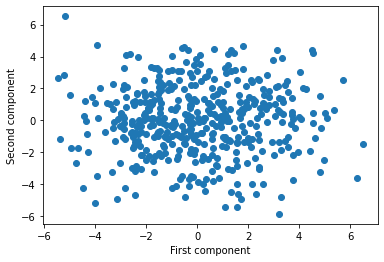

In [11]:
# We want to get XV
n_component = 2
X_new = X@u[:,:n_component]
Var = s[:n_component]
print("Variance of the first component = {}, Variance of the second component = {}".format(Var[0],Var[1]))

#Plot the projection
plt.scatter(X_new[:,0],X_new[:,1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

In [12]:
u

array([[-0.03252636,  0.00544588, -0.05210306, ...,  0.06430488,
        -0.01137579, -0.16945914],
       [ 0.05149541, -0.03122254, -0.05962028, ..., -0.03890844,
         0.02023901, -0.01128881],
       [ 0.13023778,  0.27435423,  0.02839125, ..., -0.01941286,
        -0.02473616, -0.05093125],
       ...,
       [-0.00930732, -0.12365753,  0.04302494, ..., -0.0912109 ,
         0.10793888,  0.06001093],
       [-0.0052003 , -0.00270098,  0.01663468, ...,  0.08739613,
        -0.05007539, -0.02266316],
       [-0.0038766 , -0.20312117,  0.15606389, ...,  0.10870639,
        -0.06035543,  0.06885434]])

### 7
In a biplot (as the one in the slides) we find the projected sample (as in the previous question)
and the loadings of the variables (as arrows from the center). They are defined as the product of
the singular vectors U and the square root of the singular values. Explain what the loadings are in
terms of the variance and plot them for the 1st and 2nd directions

Loading is actually the covariance of original data X and the component U. 
$$ Cov(X,U) = X^\top U = (USV^\top
L = U \sqrt(S^2) = USV^\top V^\top = X V^\top$$

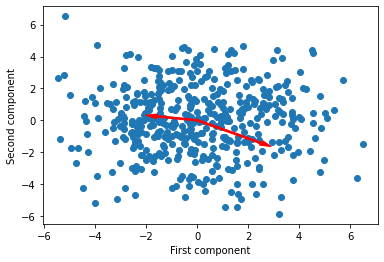

In [13]:

# Columns of W multiplied by the square root of corresponding eigenvalues, that is, eigenvectors scaled up by the variances, are called loadings in PCA or in Factor analysis.
loading = u@np.diag(np.sqrt(s))
loading = u[:,:n_component]@np.diag(np.sqrt(s[:n_component]))
#Biplot
plt.scatter(X_new[:,0],X_new[:,1])
for i in range(n_component):
    plt.arrow(0,0,loading[i,0],loading[i,1], width = 0.1,color = 'r') 
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()


### 8 
We will apply the method "PCA before OLS", which consists in applying OLS with output Y and
input X.U[:, 60], where U[:, 60] contains the eigenvectors (associated with the 2 largest eigenvalues)
of the covariance matrix. Run linear regression as follows:

• Compute projected data for both the train and the test data,

• apply the linear regression of the sklearn library to the low dimensional data,

• print the determination coefficient and the MSE of the test data and

• add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample.

In [14]:
#Compute projected data
n_component = 60
u_train,s_train,vh_train = np.linalg.svd(X_train_std.T@X_train_std)
X_train_proj = X_train_std@u_train[:,:n_component]
X_test_proj = X_test_std@u_train[:,:n_component] 

In [15]:
#Linear regression
linear_reg_PCA =linear_model.LinearRegression(fit_intercept=True).fit(X_train_proj, Y_train_std)
Y_pred_PCA = linear_reg_PCA.predict(X_test_proj)

print("determination coefficient of sklearn library", linear_reg_PCA.score(X_test_proj,Y_test_std))

print("Determination coefficient: ",determination_coefficient(Y_test_std,Y_pred_PCA))
print("MSE :",mean_square_error(Y_test_std,Y_pred_PCA))


df_test['PCA_OLS']=Y_pred_PCA.reshape(-1)
#df_coef['PCA_OLS']=linear_reg_PCA.coef_.reshape(-1)

#print(df_test.head(5))

determination coefficient of sklearn library 0.41235388387656124
Determination coefficient:  0.41235388387656124
MSE : 0.6159084548431637


### 9 
Using sklearn utilities, fit a Lasso model on the train set.

• apply the LassoCV of the sklearn library: it uses cross-validation internally for different values
of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
log scale beteween 1e-3 and 1e1 (see function np.logspace),

• print the determination coefficient and the MSE of the test data,

• print the regulatization parameter that the algorithm selects,

• add a column named lasso to the df_test dataframe that contains the predicted values for
the sample and

• add a column named lasso to the df_coef dataframe that contains the estimated coefficients

In [16]:
Lasso_reg = linear_model.LassoCV(n_alphas=30, alphas=np.logspace(-3, 1, 30), random_state=0,cv = 5).fit(X_train_std, Y_train_std.ravel())
Y_pred_LASSO = Lasso_reg.predict(X_test_std)

print("Regularization parameter alpha of this model: ", Lasso_reg.alpha_)
print("determination coefficient of sklearn library", Lasso_reg.score(X_test_std,Y_test_std))

print("Determination coefficient: ",determination_coefficient(Y_test_std,Y_pred_LASSO))
print("MSE :",mean_square_error(Y_test_std,Y_pred_LASSO))

df_test['LASSO']=Y_pred_LASSO.reshape(-1)
df_coef['LASSO']=Lasso_reg.coef_.reshape(-1)

Regularization parameter alpha of this model:  0.08531678524172806
determination coefficient of sklearn library 0.48390828824081655
Determination coefficient:  0.48390828824081655
MSE : 1.4219776477221109



### 10
Using sklearn utilities, fit a Ridge model on the train set.

• apply the RidgeCV of the sklearn library: it uses crossvalidation internally for different values
of the regularization parameter alpha: try 30 different values for alpha, spaced evenly on a
log scale beteween 1e-1 and 10e2 (see function np.logspace).

• print the determination coefficient and the MSE of the test data,

• print the regulatization parameter that the algorithm selects,

• add a column named Ridge to the df_test dataframe that contains the predicted values for
the sample and

• add a column named Ridge to the df_coef dataframe that contains the estimated coefficients

In [17]:
Ridge_reg = linear_model.RidgeCV(alphas=np.logspace(-1, 3, 1000),cv = 5).fit(X_train_std, Y_train_std.ravel())
Y_pred_RIDGE = Ridge_reg.predict(X_test_std)

print("Regularization parameter alpha of this model: ", Ridge_reg.alpha_)
print("determination coefficient of sklearn library", Ridge_reg.score(X_test_std,Y_test_std))

print("Determination coefficient: ",determination_coefficient(Y_test_std,Y_pred_RIDGE))
print("MSE :",mean_square_error(Y_test_std,Y_pred_RIDGE))

df_test['RIDGE']=Y_pred_RIDGE.reshape(-1)
df_coef['RIDGE']=Ridge_reg.coef_.reshape(-1)


Regularization parameter alpha of this model:  131.55856240457038
determination coefficient of sklearn library 0.3975311180332296
Determination coefficient:  0.3975311180332296
MSE : 1.4797746121309665


# 11

Program the method of the forward variable selection. You can use the test statistics of the test
for nullity (as seen during the course). For the moment, do not define the stop criterion for the
method, i.e. add a variables at each time until all the variables are used. Provide the order of the
variable selection.

We know that the criterion used to compare the importance of each variable is the test statistic of the test of no effect

$$\hat T_n (Y,\tilde X_k) = \frac{n^{0.5}\|\hat \theta_n(Y,\tilde X_k)\|}{\hat s_{n,k} \hat \sigma_n} \sim N(0,1)$$

$$\hat s_{n,1} = e_1^\top G_n^{-1}e_1$$

$$\hat \sigma_n = (n-2)^{-1} \|Y-\hat Y\|^2$$

In [18]:
n = X_train_std.shape[0]
X_train_std_1 = np.hstack((np.ones((n,1)), X_train_std)) #insert one column of one in X_train

def compute_Tn(X_r,r): #compute Tn
    X_1 = np.hstack((np.ones((n,1)),X_r.reshape(-1,1)))
    reg = linear_model.LinearRegression().fit(X_1,r)
    theta = reg.coef_
    Y_pred = reg.predict(X_1)
    #Compute Tn
    e1 = np.array([[0, 1]]).T 
    Gn = 1/n*(X_1.T@X_1)
    s = e1.T@np.linalg.inv(Gn)@e1
    sigma2 = 1/(n-2)*np.linalg.norm(r-Y_pred)**2
    Tn = np.sqrt(n)*np.linalg.norm(theta)/(s*np.sqrt(sigma2))
    return Tn ,Y_pred

def forward_variable_selection_no_stop(X_1, Y):
    n = X_train_std.shape[0]
    p = X_train_std.shape[1]
    
    r = Y
    A = np.arange(p)
    S = []
    
    while len(S) < p-1:
        Tn_list = []
        Y_pred_list = []
        SA = [] 
        for i in A:   #iteration of all k in A but not in S
            if i not in S:
                SA.append(i)
                Tn,Y_pred = compute_Tn(X_1[:,i],r)
                Tn_list.append(Tn)
                Y_pred_list.append(Y_pred)
        k = SA[np.argmax(Tn_list)] #compute k in argmaxTn
        S.append(k) #update S
        r = r-Y_pred  #update r
    return S
    
S = forward_variable_selection_no_stop(X_train_std, Y_train)
print(S)

[123, 58, 34, 167, 23, 174, 133, 99, 79, 129, 168, 84, 49, 13, 19, 152, 28, 208, 61, 33, 22, 112, 159, 154, 43, 80, 47, 162, 189, 95, 17, 108, 118, 85, 161, 56, 182, 147, 195, 88, 96, 90, 173, 136, 100, 185, 67, 179, 103, 153, 36, 142, 206, 24, 25, 98, 127, 175, 75, 1, 32, 202, 197, 30, 29, 94, 27, 151, 143, 18, 109, 53, 186, 184, 131, 148, 155, 196, 187, 97, 74, 57, 87, 104, 37, 31, 203, 9, 115, 170, 73, 70, 176, 69, 199, 78, 181, 180, 81, 146, 113, 132, 130, 116, 71, 107, 44, 137, 166, 111, 140, 135, 141, 204, 194, 50, 205, 165, 14, 200, 172, 10, 86, 89, 101, 158, 126, 82, 5, 177, 77, 51, 207, 46, 117, 134, 59, 102, 21, 121, 11, 191, 40, 92, 139, 15, 16, 12, 63, 93, 125, 41, 8, 60, 48, 2, 106, 178, 39, 145, 128, 45, 91, 164, 149, 183, 68, 54, 120, 52, 192, 163, 114, 20, 4, 171, 0, 62, 160, 38, 26, 190, 42, 169, 110, 65, 201, 66, 7, 76, 188, 72, 198, 144, 193, 35, 138, 157, 55, 3, 119, 64, 150, 6, 156, 83, 105, 124, 122]


### 12
Stop criterion: We choose to stop if the p-value is larger than 0.05. Illustrate the method providing
(i) the 3 graphs of the test statistics obtained when selecting the 1st, 2nd and 3rd variables (in
abscissa: the indices of the variables; in the ordinate: the value of the test statics), (ii) the graphs of
the first 50 p-values (each associated to a selected variable). On the same plot, trace the horizontal
line with the ordinate 0.05. Finally, provide the list of the selected variables

In [19]:
def forward_variable_selection_stop(X_1, Y):
    n = X_train_std.shape[0]
    p = X_train_std.shape[1]
    
    r = Y
    A = np.arange(p)
    S = []
    
    while len(S) < p-1:
        Tn_list = []
        Y_pred_list = []
        SA = [] 
        for i in A:   #iteration of all k in A but not in S
            if i not in S:
                SA.append(i)
                Tn,Y_pred = compute_Tn(X_1[:,i],r)
                Tn_list.append(Tn)
                Y_pred_list.append(Y_pred)
        k = SA[np.argmax(Tn_list)] #compute k in argmaxTn
        S.append(k) #update S
        r = r-Y_pred  #update r
        p_value = 2*(1-scipy.stats.norm.cdf(np.max(Tn_list)))#find the min p_value <=> find the max Tn
        if p_value > 0.05:
            print("We stop because all p_value are bigger than 0.05")
            return S
    return S

S = forward_variable_selection_stop(X_train_std, Y_train)
print(S)

We stop because all p_value are bigger than 0.05
[123, 58, 34, 167, 23, 174, 133, 99, 79, 129, 168, 84, 49, 13, 19, 152, 28, 208, 61]


We found that with the stop criterion, the first variables are the same, but it eliminates many other variables with a p_value bigger than 0.05, whch means that these covaroates have no effect

### 13
Run OLS on the selected variables.

• apply the OLS of the sklearn library.

• print the determination coefficient and the MSE of the test data,

• add a column named FVS to the df_test dataframe that contains the predicted values for the
sample and

• add a column named FVS to the df_coef dataframe that contains the estimated coefficients.

In [20]:
X_train_selected = X_train_std[:, S]
X_test_selected = X_test_std[:, S]

linear_reg_selected =linear_model.LinearRegression().fit(X_train_selected, Y_train_std)
Y_pred = linear_reg_selected.predict(X_test_selected)

print("determination coefficient of sklearn library", linear_reg_selected.score(X_test_selected,Y_test_std))

print("Determination coefficient: ",determination_coefficient(Y_test_std,Y_pred))
print("MSE :",mean_square_error(Y_test_std,Y_pred))


coef = np.zeros(X_train.shape[1]).reshape(-1)
j = 0
for i in S:
    coef[i] = linear_reg_selected.coef_[:,j]
    j = j+1

df_test['FVS']=Y_pred.reshape(-1)
df_coef['FVS']=coef

print(df_coef.head(100))

determination coefficient of sklearn library 0.4693073613430807
Determination coefficient:  0.4693073613430807
MSE : 0.5562158484566007
             OLS     LASSO     RIDGE       FVS
0   7.396077e+13  0.000000  0.004997  0.000000
1   1.946277e+13  0.000000  0.009270  0.000000
2  -4.474714e+13 -0.000000 -0.000360  0.000000
3  -2.270448e+13 -0.000000 -0.001915  0.000000
4  -5.934315e+12 -0.000000 -0.016745  0.000000
..           ...       ...       ...       ...
95  1.029243e+13  0.001347  0.019509  0.000000
96 -2.317210e+13 -0.000000 -0.013026  0.000000
97 -1.982283e+13 -0.000000 -0.009421  0.000000
98  1.129828e+13 -0.000000 -0.010681  0.000000
99  1.171875e-02  0.000000 -0.002025 -0.032528

[100 rows x 4 columns]


### 14
Summarize the results of all the methods: Compare the values of the coefficients from the different
methods by plotting df_coef. Avoid using lines (i.e., use only markers) for a better interpretability
of the plot.

From the above results, it can be seen that the LASSO and FSV methods perform the best for the indicator determinant coefficient. On the other hand, Lasso and Ridge do not perform very well in MSE, even less well than the baseline model. From the plot of df_coef, we find that the model parameters of the OLS are large, while the model parameters of the other methods are small. For Lasso, Ridge and FVS, they all have many parameters with values of 0 or near 0, especially for FVS and Lasso.

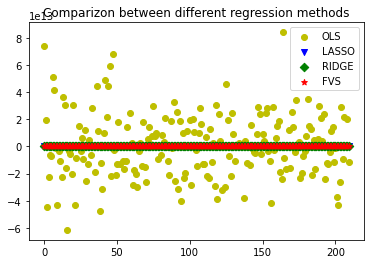

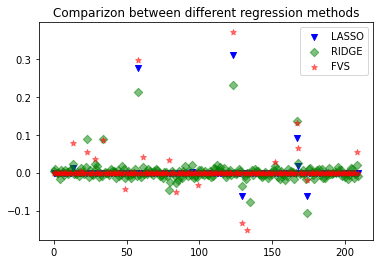

In [21]:
x = range(len(df_coef['OLS']))
plt.scatter(x,df_coef['OLS'],c='y', marker='o',label='OLS')
plt.scatter(x,df_coef['LASSO'],c='b', marker='v',label='LASSO')
plt.scatter(x,df_coef['RIDGE'],c='g', marker='D',label='RIDGE')
plt.scatter(x,df_coef['FVS'],c='r', marker='*',label='FVS')
plt.legend()
plt.title("Comparizon between different regression methods")
plt.show()

x = range(len(df_coef['OLS']))
plt.scatter(x,df_coef['LASSO'],c='b', marker='v',label='LASSO')
plt.scatter(x,df_coef['RIDGE'],c='g', marker='D',label='RIDGE',alpha = 0.5)
plt.scatter(x,df_coef['FVS'],c='r', marker='*',label='FVS',alpha = 0.5)
plt.legend()
plt.title("Comparizon between different regression methods")
plt.show()

### 15
How many coefficients are set exactly to zero by each of the methods considered in the data frame
df_coef? (That is: OLS, Lasso, Ridge and FVS but not PCA before OLS). Why is the number of
coefficients set to 0 so different for Lasso and Ridge?

In [22]:
print("The number of non-zero coefficient of OLS is ",np.count_nonzero(df_coef['OLS'].to_numpy()))
print("The number of non-zero coefficient of LASSO is ",np.count_nonzero(df_coef['LASSO'].to_numpy()))
print("The number of non-zero coefficient of RIDGE is ",np.count_nonzero(df_coef['RIDGE'].to_numpy()))
print("The number of non-zero coefficient of FVS is ",np.count_nonzero(df_coef['FVS'].to_numpy()))

The number of non-zero coefficient of OLS is  210
The number of non-zero coefficient of LASSO is  10
The number of non-zero coefficient of RIDGE is  210
The number of non-zero coefficient of FVS is  19


We found that Lasso and FVS　gives many zero coefficient, while RIDGE and OLS remains all the coefficients. 

The difference between ridge and lasso is because of the L1 norm and L2 norm. The L1-norm will force some coefficients to zero quickly. This means that the variables are removed from the model and therefore sparsity occurs.The L2-norm will more or less compress the coefficients, making them smaller but it does not necessarily result in the coefficients becoming zero, causing this covariate to be removed.

### 16
Give a pairplot of the df_test dataframe. Let the fitted coefficient of the previous problems be $\hat\theta^{rd}$
for the ridge, $\hat\theta^{ols}$for the OLS, $\hat \theta^{PCA}$for the PCA before OLS, $\hat\theta^{ls}$ for the lasso. Specify the equation to predict the value of a new, unseen data point x

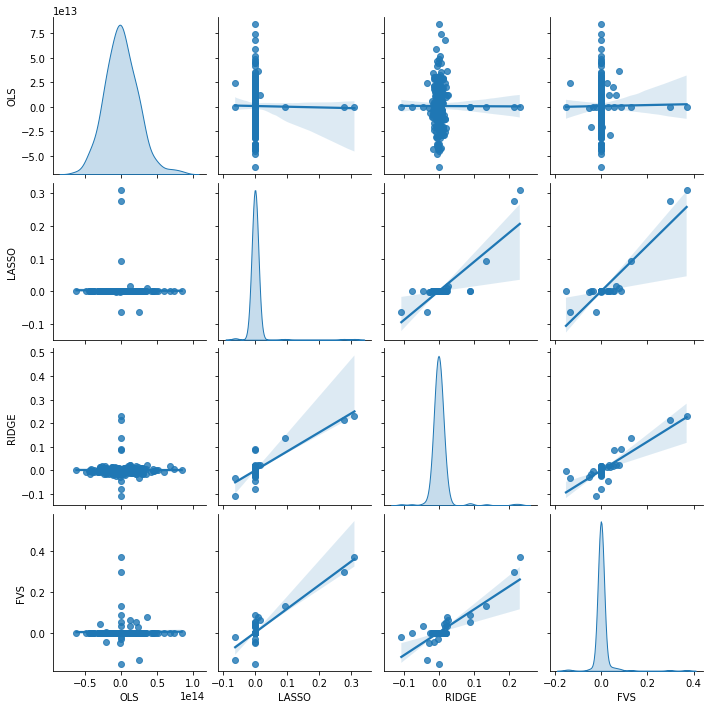

In [23]:
sns.pairplot(df_coef,kind="reg",diag_kind="kde")

Ridge:  $$y_{pred} = \frac{x-\mu_x}{\sigma_x} \hat\theta^{rd}$$

OLS:  $$y_{pred} = \frac{x-\mu_x}{\sigma_x} \hat\theta^{ols}$$

PCA before OLS: $$y_{pred}= \frac{x-\mu_x}{\sigma_x} U \hat\theta^{rd}$$

Lasso: $$y_{pred} = \frac{x-\mu_x}{\sigma_x} \hat\theta^{ls}$$

We notice that the PCA before OLS is different. It is because we need to calculate the projection of this unseen data first, and then use our trained model to fit and predit it. The U here is our projection matrix containing the most biggest eigenvectors of the covariance matrix.

### 17

Load the Diabetes dataset form sklearn (load_diabetes(return_X_y=True)) and let X be the 3rd
column of the loaded data (the feature matrix consists only on variable 3 from the original dataset).
We are going to compute approximately the confidence intervals (CI) for the θ1 coefficient via
Bootstrapping.

• Give the OLS coefficient for the slope,$\theta_1$.

• Code manually the expression for the confidence intervals and evaluate it for α “ 0.05 (using
statsmodel is not allowed).

• We denote the concatenation of X and y as Xy. Generate k bootstrap samples from Xy, for
k=np.linspace(10,10000). A bootstrap sample has the same dimension as Xy, is formed of
datapoints (rows) drawn, with replacement, from Xy.

• (For each value of k) (i) Estimate the θ1 coefficient for each bootstrapped sample with sklearn,
(ii) get an approximation of the CI by getting the (α, 1-α) percentile of the values in step
(i).

• Plot, for each value of k, which is the difference between the approximated CI in the previous
step and the real CI.

• Does the CI increase with α? Why?

In [25]:
X_diabetes,Y_diabetes = datasets.load_diabetes(return_X_y=True)
X_diabetes_3 = X_diabetes[:,2] # 3rd column
linear_reg_diabetes =linear_model.LinearRegression().fit(X_diabetes_3.reshape(-1,1), Y_diabetes.reshape(-1,1))

theta_1_real = linear_reg_diabetes.coef_[0][0]
print("theta_1 = ",theta_1_real)

theta_1 =  949.4352603839491


We are at non gaussian case, and the confidence interval for linear regression of $\theta_1$ is $[\theta_1 - q_{1-\frac{\alpha}{2}} \sigma \sqrt{(X^\top X)^{-1}}, \theta_1 + q_{1-\frac{\alpha}{2}} \sigma \sqrt{(X^\top X)^{-1}} ]$ and $\sigma^2 = \frac{1}{n-1}\|y-X\hat\theta\|$

In [31]:
def confidence_interval_of_diabetes(X,Y,theta,a,linear_reg_diabetes):
    n = len(Y)-1
    Y_pred = linear_reg_diabetes.predict(X.reshape(-1, 1))
    sigma = 1/(len(Y_diabetes)-1) * np.linalg.norm(Y_diabetes - Y_pred)
    q = scipy.stats.norm.ppf(1-a/2)
    CI_min = theta - q*sigma*np.sqrt((X.T@X)**(-1))
    CI_max = theta + q*sigma*np.sqrt((X.T@X)**(-1))
    return CI_min, CI_max

a = 0.05
CI_min,CI_max = confidence_interval_of_diabetes(X_diabetes_3,Y_diabetes,theta_1_real,a,linear_reg_diabetes)
print("Confidence interval: ",CI_min,CI_max)
if theta_1_real < CI_max and theta_1_real > CI_min:
    print("Theta1 is in this confidence interval")
else:
    print("Theta1 is not in this confidence interval")

Confidence interval:  774.0705433652769 1124.7999774026212
Theta1 is in this confidence interval


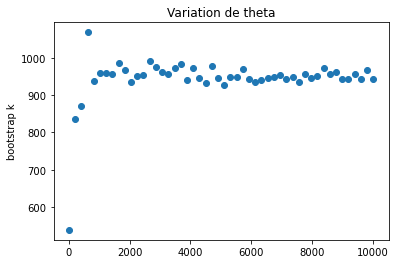

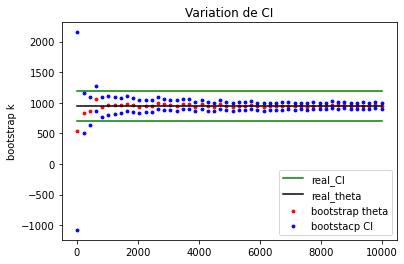

In [77]:
Xy = np.vstack((X_diabetes_3,Y_diabetes)).T

k=np.linspace(10,10000) #bootstrap sample number
theta_list = []
Xy_list = []
CI_list = []
a = 0.005
q = scipy.stats.norm.ppf([a, 1-a])

for i in k:
    ## Estimate theta1
    Xy_i = sklearn.utils.resample(Xy, n_samples=int(i))
    linear_reg_diabetes =linear_model.LinearRegression().fit( Xy_i[:,0].reshape(-1,1), Xy_i[:,1].reshape(-1,1))
    theta_1 = linear_reg_diabetes.coef_[0][0]
    theta_list.append(theta_1)
    ##CI of bootstrap
    Y_pred = linear_reg_diabetes.predict(Xy_i[:,0].reshape(-1, 1))
    sigma = 1/(len(Xy_i[:,1])-1) * np.linalg.norm(Xy_i[:,1] - Y_pred)
    CI = theta_1 + q*sigma*np.sqrt((Xy_i[:,0]@Xy_i[:,0])**(-1))
    CI_list.append(CI)
CI_list = np.array(CI_list)

plt.scatter(k,theta_list)
plt.ylabel("bootstrap k")
plt.title("Variation de theta")
plt.show()

#real CI
CI_min,CI_max = confidence_interval_of_diabetes(X_diabetes_3,Y_diabetes,theta_1_real,a,linear_reg_diabetes)
plt.scatter(k,theta_list,label = "bootstrap theta",color = 'r',s=8)
plt.scatter(k,CI_list[:,0],label = "bootstacp CI",color = 'b',s=8)
plt.scatter(k,CI_list[:,1],color = 'b',s=8)
plt.plot(k,np.ones(len(k))*CI_min,color = 'g')
plt.plot(k,np.ones(len(k))*CI_max,label = "real_CI",color = 'g')
plt.plot(k,np.ones(len(k))*theta_1_real,label = "real_theta",color = 'black')
plt.ylabel("bootstrap k")
plt.legend()
plt.title("Variation de CI")
plt.show()

We found that under the algorithm of bootstap, the confidential interval becomes smaller when k increases. It is reasonable, because the more data we have, the more confident we feel for our results.

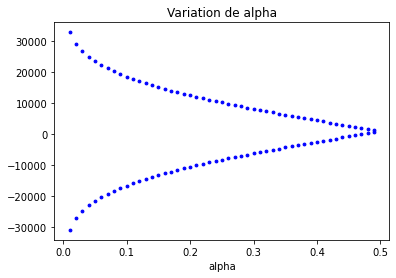

In [94]:
CI_list_a = []
a_list = np.arange(0.01, 0.5, 0.01)
for a in a_list:
    n = len(Y)-1
    Y_pred = linear_reg_diabetes.predict(X.reshape(-1, 1))
    sigma = 1/(len(Y_diabetes)-1) * np.linalg.norm(Y_diabetes - Y_pred)
    q = scipy.stats.norm.ppf([a,1-a])
    CI_real = theta_1_real + q*sigma*np.sqrt((X_diabetes_3.T@X_diabetes_3)**(-1))
    CI_list_a.append(CI_real)

CI_list_alpha = np.array(CI_list_a)

plt.scatter(a_list, CI_list_alpha[:,0],color = 'b',s=8)
plt.scatter(a_list, CI_list_alpha[:,1],color = 'b',s=8)
plt.title("Variation de alpha")
plt.xlabel("alpha")
plt.show()

We notice that the confidence interval decreases when alpha increases. Since the quantiles keep getting closer closer when alpha increases, therefore, the confidence interval becomes less wider. 